<a href="https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab1/L1_Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 1.1 IoT Sensor Data Collection 1 - Temperature Sensor

##Learning Goals


* Students will be able to code in Python to read data from the DS18B20 sensor.
* Students will be able to code in Python to save sensory data in a csv file.
* Students will be able to plot sensory data in a line chart.



## 1.1 Introduction

In Lab1, we will measure atmospheric temperature from DS18B20. Each DS18B20 is already calibrated in the laboratory which is accurate temperature calibration. Because the calibration coefficients are stored in the OTP (One-Time Programmable) memory of the sensor, we do not need to calibrate the sensor. The single-wire serial interface makes system integration quick and easy. Typical application and wiring diagram of DS18B20 is shown in Figure 1. Technical specifications are shown in Table 1.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S25_update/lab1_fig1.png?raw=true" width='70%'>

*Figure 1 Wiring diagram of DS18B20 and application (MCU: Micro-computer unit)*

*Table 1 Overview of sensor specification*

<table width="672">
<tbody>
<tr>
<td width="86">
<p>Sensor</p>
</td>
<td width="111">
<p>Measurement</p>
</td>
<td width="104">
<p>Range</p>
</td>
<td width="200">
<p>Accuracy</p>
</td>
<td width="120">
<p>Refresh rate</p>
</td>
<td width="103">
<p>Resolution</p>
</td>
<td width="120">
<p>Package</p>
</td>
</tr>

<tr>
<td width="86">
<p>DS18B20</p>
</td>
<td width="111">
<p>Temperature</p>
</td>
<td width="150">
<p>-55&deg;C to 125&deg;C</p>
</td>
<td width="200">
<p>&plusmn;0.5&deg;C from -10&deg;C to 85&deg;C</p>
</td>
<td width="120">
<p>1 seconds</p>
</td>
<td width="103">
<p>0.0625</p>
</td>
<td width="120">
<p>3 Pin single row</p>
</td>
</tr>

</tbody>
</table>
<p>&nbsp;</p>

To make a connection between DS18B20 and Raspberry Pi, we will use GIPO (General-Purpose Input/Output) pins. The raw of GPIO pins is on powerful feature of the Raspberry Pi that allows us to make connection between Raspberry Pi and outside world. GPIO pins and number is shown in Figure 2 (Source:
https://learn.sparkfun.com/tutorials/introduction-to-the-raspberry-pi-gpio-and-physical-computing/gpio-pinsoverview, available on Dec. 19, 2024). In lab manuals, pin wiring connection is described using pin number. For example, Pin 16 of Raspberry Pi means GPIO 23.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab1_fig2.png?raw=true" width="100%">

*Figure 2 Raspberry Pi (left) and GPIO pins with numbers (right)*

In ‘Terminal’ you can see pin information as well. Using ‘pinout’ command, you can check basic information, board layout, GPIO pin information, and so on. Try the command below.

---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_RaspberryPi.png?raw=tru" width="20">Raspberry Pi - Terminal**

`pinout`

---

Using GPIO pin connection and Python programming, in this lab, you will measure the atmospheric temperature of DS18B20. Furthermore, you will save the collected data in a CSV file and plot to see the measured data.


## 1.2 Wiring Connection

Pin information of DS18B20 is shown in Figure 3. Using jumper wires given, make connection as Table 3. **To connect the sensor to your Raspberry Pi, please refere to Figure 4.**

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S25_update/lab1_fig3.png?raw=true" width="50%">

*Figure 3 DS18B20 and pin information*

*Table 3 Pin wiring connection between DS18B20 and Raspberry Pi*

<table width="365">
<tbody>
<tr>
<td width="183">
<p>DS18B20</p>
</td>
<td width="182">
<p>Raspberry Pi</p>
</td>
</tr>
<tr>
<td width="183">
<p>Pin 2 (Data, out)</p>
</td>
<td width="182">
<p>Pin 16 (GPIO 23)</p>
</td>
</tr>
<tr>
<td width="183">
<p>Pin 3 (Vcc, +)</p>
</td>
<td width="182">
<p>Pin 1 (3.3V power*)</p>
</td>
</tr>
<tr>
<td width="183">
<p>Pin 1 (GND, -)</p>
</td>
<td width="182">
<p>Pin 6 (GND*)</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>


If you are already using a Pin, as Pin1 or Pin 6 of Raspberry Pi for any reasons, you can use alternatives. If alternatives are available, it is marked with * (asterisk mark). For example, Pin 17 (3.3V power) of Raspberry Pi is the same of Pin 1. Therefore, you can use Pin 17 instead of Pin 1 and Pin 9, 14, 20, 25, 34, or 39 instead of Pin 6. See the GPIO pins (Figure 2). Wiring diagram and configuration are shown in Figure 4 and Figure 5.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S25_update/lab1_fig4.png?raw=true" width="70%">

*Figure 4 Wiring diagram for DS18B20*

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S25_update/lab1_fig5.png?raw=true" width="70%">

*Figure 5 Wiring configuration for DS18B20*



### Task 1.1

Take a picture of your wiring configuration as Figure 5 and attach it below:





---

Place your screenshot in here.

---

Now, we are ready to read data from DS18B20.

## 1.3 Reading Data from DS18B20 (Python)

Before read data, you should change the option inside of the raspberry pi.
Goto 'terminal' inside of the Raspberry Pi and enter '/boot/firmware/config.txt'

---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_RaspberryPi.png?raw=tru" width="20">Raspberry Pi - Terminal**

`sudo nano /boot/firmware/config.txt`

---

Scroll down to the end, and type 'dtoverlay=w1-gpio,gpiopin=23' as the figure 6.
You can change gpiopin number if you using different pin configuration.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S26_update/Lab1_fig6.PNG?raw=true" width="70%">

*Figure 6 Configuration for DS18B20*

Using GPIO pin connection and Python programming, in this lab, you will measure the atmospheric temperature of DS18B20. Furthermore, you will save the collected data in a CSV file and plot to see the measured data.

To read data, we will use Python code to measure DS18B20 sensor value. If you want to see the details, see the manual attached on [here](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab1/DS18B20-Manual.pdf). Create a Python script (e.g., DS18B20.py) on Raspberry Pi, and then copy and paste the code below and run it. The data type of each measurement is an integer.

You can write or modify Python code on the Raspberry Pi using Geany (Menu > Programming > Geany).

Or

After downloading and installing the program from the link below, you will be able to transfer files between your laptop and the Raspberry Pi. (https://winscp.net/eng/index.php)

* Comments are described after # (pound-sign) in the code.

---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Python.png?raw=tru" width="20">Python - Python 3 ([DS18B20_sample.py](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab1/DS18B20_sample.py))**

```
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import os
import glob
import time

os.system('modprobe w1-gpio')
os.system('modprobe w1-therm')

base_dir = '/sys/bus/w1/devices/'
device_folder = glob.glob(base_dir + '28*')[0]
device_file = device_folder + '/w1_slave'

def read_temp_raw():
	f = open(device_file, 'r')
	lines = f.readlines()
	f.close()
	return lines

def read_temp():
	lines = read_temp_raw()
	while lines[0].strip()[-3:] != 'YES':
		time.sleep(0.2)
		lines = read_temp_raw()
	equals_pos = lines[1].find('t=')
	if equals_pos != -1:
		temp_string = lines[1][equals_pos+2:]
		temp_c = float(temp_string) / 1000.0
		temp_f = temp_c * 9.0 / 5.0 + 32.0
		return temp_c, temp_f
while True:
	temperature_celsius, temperature_fahrenheit = read_temp()
	print(f'Temperature: {temperature_celsius:.2f} °C')
	print(f'Temperature: {temperature_fahrenheit:.2f} °F')
	print('')
	time.sleep(1)
```

---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_RaspberryPi.png?raw=tru" width="20">Raspberry Pi - Terminal**

`python3 DS18B20_sample.py`

---

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S25_update/lab1_fig7.png?raw=true" width="70%">

*Figure 7 Terminal window after running sample code for DS18B20*


You may need to handle any error that can occur. ‘try’ and ‘except’ functions of Python may help. Search try and except on the Internet if you are a beginner in Python.

### Task 1.2

Capture the terminal window after running sample code and attach it to the report below:


---

Place your screenshot in here.
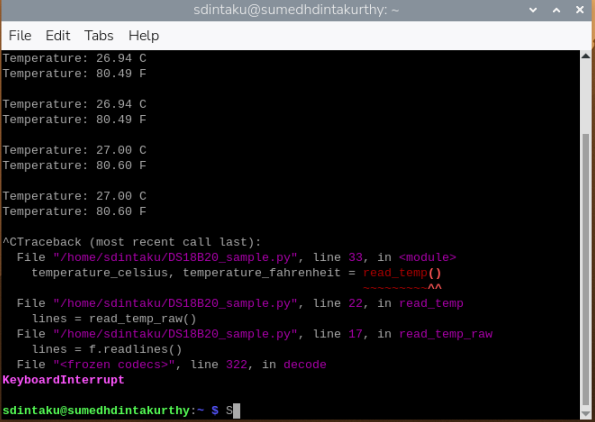
---

### Task 1.3

1. Modify the sample code (DS18B20_sample.py) to collect temperature (in digrees Celsius and Fahrenheit) with timestamps of each measurement for more than 1 minute and save the data in a CSV file.
  * Try to change temperature while collecting data to see if it works well (e.g., gently wrapping around the sensor with your hands may help).
  * Headers of the CSV file should be ‘Timestamp’, ‘Temperature(&deg;C)’, and ‘Temperature(&deg;F)’.
  * Hint: use ‘csv’, ‘time’ and ‘datetime’ packages and ‘while’ or ‘for’ loop.
  
  * Note that the minimum refresh rate of DS18B20 is 1 seconds. So, measurement period (sampling period) of your code should be more than or equal to 1 seconds (e.g., 1 seconds).

2. Copy and paste below the code that you developed for this Task.

3. Once the csv file is generated, save a copy of it in your laptop (You will need it for plotting)


In [ ]:
#Copy + Paste your code below this line
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import os
import glob
import time
import csv
from datetime import datetime

# Load 1-Wire kernel modules
os.system('modprobe w1-gpio')
os.system('modprobe w1-therm')

# Base directory for 1-Wire devices
base_dir = '/sys/bus/w1/devices/'

# Find DS18B20 device folder (family code 28)
device_folders = glob.glob(base_dir + '28*')
if not device_folders:
    raise RuntimeError("No DS18B20 sensor found")

device_folder = device_folders[0]
device_file = device_folder + '/w1_slave'

def read_temp_raw():
    with open(device_file, 'r') as f:
        return f.readlines()

def read_temp():
    lines = read_temp_raw()
    while lines[0].strip()[-3:] != 'YES':
        time.sleep(0.2)
        lines = read_temp_raw()

    equals_pos = lines[1].find('t=')
    if equals_pos != -1:
        temp_string = lines[1][equals_pos + 2:]
        temp_c = float(temp_string) / 1000.0
        temp_f = temp_c * 9.0 / 5.0 + 32.0
        return temp_c, temp_f

# CSV file name
csv_filename = "temperature_data.csv"

# Open CSV file and write header
with open(csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Timestamp', 'Temperature(C)', 'Temperature(F)'])

    print("Collecting temperature data...")

    start_time = time.time()
    duration = 70  # seconds (> 1 minute)

    while time.time() - start_time < duration:
        temp_c, temp_f = read_temp()
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        # Write row to CSV
        csv_writer.writerow([timestamp, f"{temp_c:.2f}", f"{temp_f:.2f}"])

        # Print to terminal
        print(f"{timestamp} | {temp_c:.2f} C | {temp_f:.2f} F")

        time.sleep(1)  # Sampling period = 1 second

print(f"\nData collection complete. CSV saved as '{csv_filename}'.")


<br></br>

Please continue to [Lab 1.2 here](https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab1/L1_Colab2.ipynb).
